## Ablation design

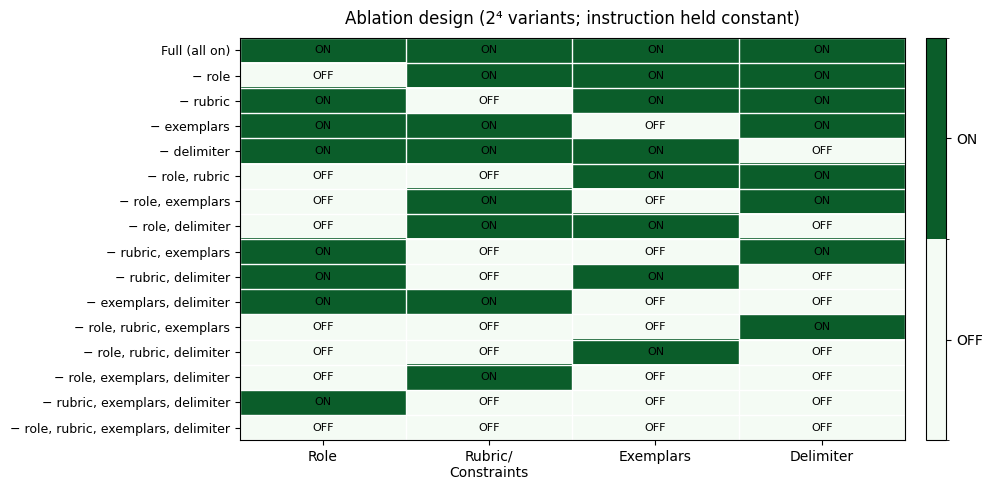

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from pathlib import Path

components = ["Role", "Rubric/\nConstraints", "Exemplars", "Delimiter"]

variants = [
    ("Full (all on)", []),
    ("− role", ["Role"]),
    ("− rubric", ["Rubric/\nConstraints"]),
    ("− exemplars", ["Exemplars"]),
    ("− delimiter", ["Delimiter"]),
    ("− role, rubric", ["Role", "Rubric/\nConstraints"]),
    ("− role, exemplars", ["Role", "Exemplars"]),
    ("− role, delimiter", ["Role", "Delimiter"]),
    ("− rubric, exemplars", ["Rubric/\nConstraints", "Exemplars"]),
    ("− rubric, delimiter", ["Rubric/\nConstraints", "Delimiter"]),
    ("− exemplars, delimiter", ["Exemplars", "Delimiter"]),
    ("− role, rubric, exemplars", ["Role", "Rubric/\nConstraints", "Exemplars"]),
    ("− role, rubric, delimiter", ["Role", "Rubric/\nConstraints", "Delimiter"]),
    ("− role, exemplars, delimiter", ["Role", "Exemplars", "Delimiter"]),
    ("− rubric, exemplars, delimiter", ["Rubric/\nConstraints", "Exemplars", "Delimiter"]),
    ("− role, rubric, exemplars, delimiter", ["Role", "Rubric/\nConstraints", "Exemplars", "Delimiter"]),
]

base = {c: 1 for c in components}
matrix = []
row_labels = []

for label, off_list in variants:
    row = base.copy()
    for c in off_list:
        row[c] = 0
    matrix.append([row[c] for c in components])
    row_labels.append(label)

M = np.array(matrix, dtype=int)


fig, ax = plt.subplots(figsize=(10, 5))

cmap = ListedColormap(["#f4fbf4", "#0b5d2a"])
norm = BoundaryNorm([-0.5, 0.5, 1.5], cmap.N)

im = ax.imshow(M, cmap=cmap, norm=norm, aspect="auto")


ax.set_xticks(np.arange(-0.5, M.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, M.shape[0], 1), minor=True)
ax.grid(which="minor", color="white", linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

ax.set_xticks(np.arange(M.shape[1]))
ax.set_xticklabels(components, fontsize=10)
ax.set_yticks(np.arange(M.shape[0]))
ax.set_yticklabels(row_labels, fontsize=9)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        ax.text(
            j, i,
            "ON" if M[i, j] == 1 else "OFF",
            ha="center", va="center",
            fontsize=8, color="black"
        )

ax.set_title("Ablation design (2⁴ variants; instruction held constant)", fontsize=12, pad=10)

cbar = fig.colorbar(im, ax=ax, fraction=0.03, pad=0.03, ticks=[0, 1])
cbar.ax.set_yticklabels(["OFF", "ON"])

output_path= Path.cwd() / "Figures" / "Python-charts"
fig_name = 'ablation_design_matrix.png'

plt.tight_layout()
plt.savefig(output_path/fig_name, dpi=300, bbox_inches="tight")
plt.show()